In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_path = '/Users/jun/GitStudy/Data_4/Data/'
marketing_path = data_path+'marketing/'

In [3]:
os.chdir(marketing_path)
os.listdir()

['241220_초안.twbx',
 '문서2.twb',
 'sankey_chart_data.csv',
 'marketing_data_20241217.csv',
 '.DS_Store',
 '~$발표 정리.docx',
 '선택 날짜 기준 1년 Metric.twbx',
 'added.csv',
 '발표 정리.docx',
 '대본.docx',
 'sankey_chart_data_monthly.csv',
 'image',
 'project_1218.twb',
 '현준_1221.twbx',
 'project_1219.twb',
 '용어.docx',
 'ppt',
 '12_23.twbx',
 'project.twb',
 'project_1221.twbx']

In [4]:
marketing_df = pd.read_csv('marketing_data_20241217.csv')

## 데이터 확인

In [5]:
marketing_df.head(5)

,Activity Date,country,os,Activity Type,Campaign ID,Campaign Name,Campaign Objective,Channel,Conversion Funnel Stage,Source,...,Visibility,Campaign Duration,Clicks,Conversions,Cost,Engagement Rate,Engagement Time,Impressions,Revenue,ROI
0,2019-03-31,CN,iOS,Social Media,10000,Black Friday,Conversion,Facebook,Decision,Paid,...,6201,21,10689,919,1967.89,9.73,313,52265,44627.27,4.54
1,2024-06-13,KR,Android,Affiliate,10001,Summer Deals,Awareness,Facebook,Awareness,Organic,...,2066,27,6730,557,3395.21,5.94,320,18069,13801.83,4.94
2,2023-07-28,JP,iOS,Email,10002,Summer Deals,Conversion,YouTube,Consideration,Organic,...,5247,21,27185,2596,5801.66,0.26,230,68204,41133.20,0.02
3,2019-03-24,KR,Android,Email,10003,Holiday Special,Conversion,Twitter,Consideration,Direct,...,5508,28,28948,2399,7227.13,0.19,418,77720,24103.43,-0.32
4,2024-12-20,KR,iOS,Social Media,10004,Black Friday,Awareness,Facebook,Consideration,Organic,...,6070,22,1306,108,5679.99,2.81,371,3509,9496.62,0.61


In [6]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Activity Date            20000 non-null  object 
 1   country                  20000 non-null  object 
 2   os                       20000 non-null  object 
 3   Activity Type            20000 non-null  object 
 4   Campaign ID              20000 non-null  int64  
 5   Campaign Name            20000 non-null  object 
 6   Campaign Objective       20000 non-null  object 
 7   Channel                  20000 non-null  object 
 8   Conversion Funnel Stage  20000 non-null  object 
 9   Source                   20000 non-null  object 
 10  Target Audience          20000 non-null  object 
 11  Visibility               20000 non-null  int64  
 12  Campaign Duration        20000 non-null  int64  
 13  Clicks                   20000 non-null  int64  
 14  Conversions           

In [7]:
#데이터타입 변환
marketing_df['Activity Date']= pd.to_datetime(marketing_df['Activity Date'])
marketing_df['Campaign ID'] = marketing_df['Campaign ID'].to_string()

In [8]:
#year, year-month 변한
marketing_df['year'] = marketing_df['Activity Date'].dt.year
marketing_df['Y-m'] = marketing_df['Activity Date'].dt.strftime('%Y-%m')

In [9]:
#나라 별 캠페인 카운트
marketing_df['country'].value_counts()

KR    5728
CN    3852
AT    1758
HK    1339
DK    1134
DE    1088
JP    1034
ES     648
AU     647
GB     633
BR     606
VN     475
TH     467
CA     311
CH     280
Name: country, dtype: int64

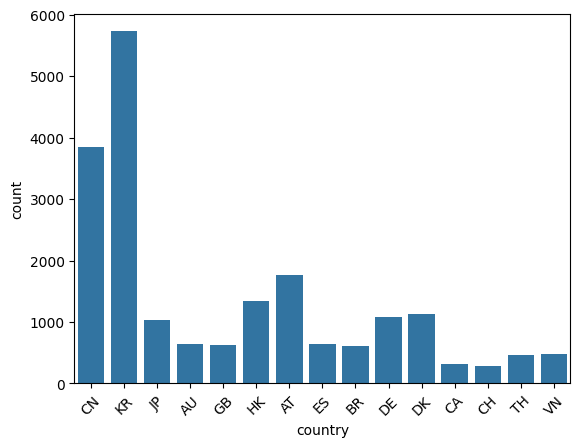

In [10]:
#국가별(필터) 캠페인별 시각화
sns.countplot(data=marketing_df, x='country')
plt.xticks(rotation=45)
plt.show()

In [ ]:
marketing_df.groupby('country')['Revenue'].mean()

In [25]:
marketing_df.groupby('country')['Revenue'].mean()

country
AT    25357.598595
AU    24344.777172
BR    25192.780677
CA    25547.060579
CH    24616.328357
CN    24804.653847
DE    24540.066691
DK    25122.839594
ES    24186.008765
GB    26007.675229
HK    24590.708633
JP    25098.481876
KR    25239.846828
TH    24615.497002
VN    23986.335179
Name: Revenue, dtype: float64

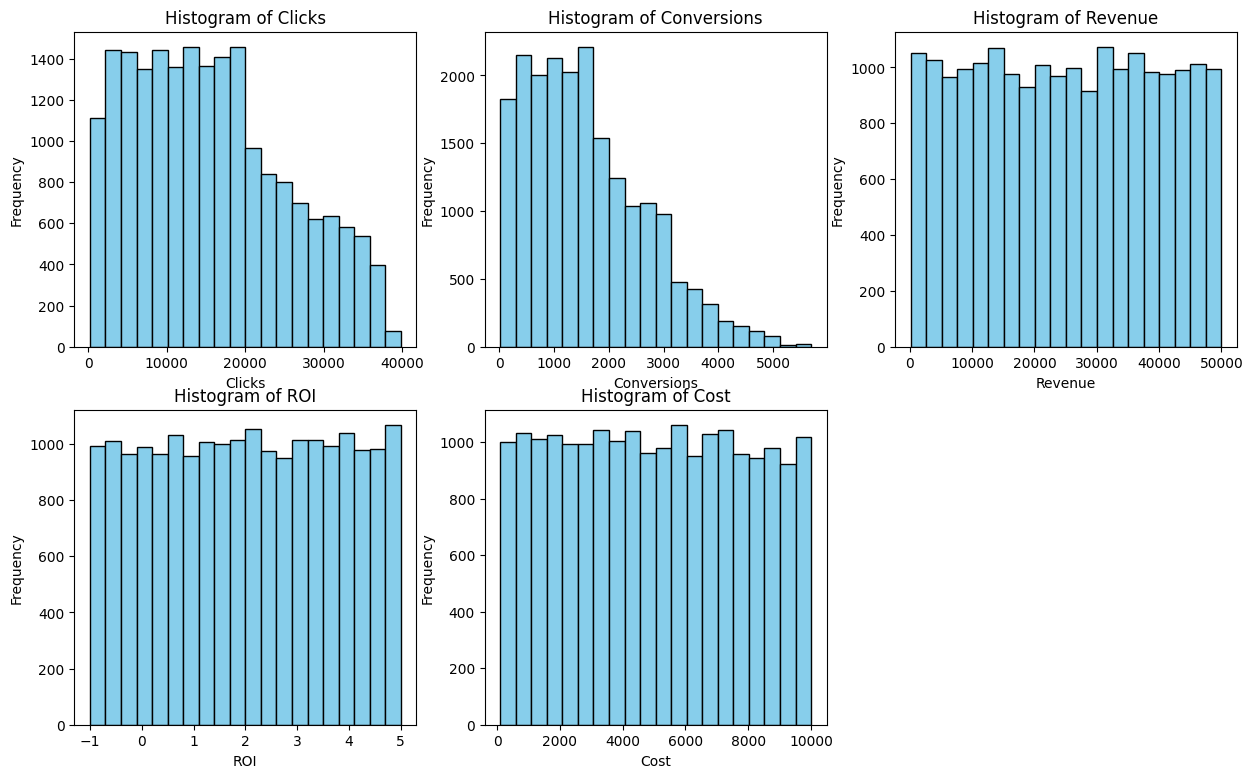

In [11]:
#히스토그램으로 정규분포 확인
numerical_columns = ['Clicks', 'Conversions', 'Revenue', 'ROI', 'Cost']

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    axes[i].hist(marketing_df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [12]:
marketing_df['Activity Type'].value_counts()

PPC                  3380
Affiliate            3361
Content Marketing    3360
SEO                  3344
Email                3337
Social Media         3218
Name: Activity Type, dtype: int64

In [13]:
# 인지, 고려, 결정
marketing_df['Conversion Funnel Stage'].value_counts()

Decision         6761
Awareness        6660
Consideration    6579
Name: Conversion Funnel Stage, dtype: int64

In [14]:
marketing_df['Campaign Name'].value_counts()

Summer Deals       4063
New Launch         4038
Black Friday       4030
Holiday Special    3939
Spring Sale        3930
Name: Campaign Name, dtype: int64

In [15]:
marketing_df['Source'].value_counts()

Paid        5098
Referral    5000
Direct      4974
Organic     4928
Name: Source, dtype: int64

In [16]:
marketing_df['Channel'].value_counts()

LinkedIn     3449
Twitter      3368
Facebook     3352
Google       3332
YouTube      3269
Instagram    3230
Name: Channel, dtype: int64

## 파생변수 생성

CTR, CVR, ROAS, CPC, CPM

In [17]:
metric_df = marketing_df.copy()

CPC = sum([Cost])/sum([Clicks])

CPM = (SUM([Cost])/SUM([Impressions])) *1000

CTR = (sum([Clicks])/sum([Impressions]))*100

CVR = (sum([Conversions])/sum([Clicks]))*100

ROAS = (sum([Revenue])/sum([Cost]))*100

In [18]:
metric_df.loc[:,'CPC'] = metric_df['Cost']/metric_df['Clicks']
metric_df.loc[:,'CTR'] = metric_df['Clicks']/metric_df['Impressions']*100
metric_df.loc[:,'CVR'] = metric_df['Conversions']/metric_df['Clicks']*100
metric_df.loc[:,'ROAS'] = metric_df['Revenue']/metric_df['Cost']*100

In [19]:
numeric_df  = metric_df.select_dtypes(include='number')

In [20]:
numeric_df

,Visibility,Campaign Duration,Clicks,Conversions,Cost,Engagement Rate,Engagement Time,Impressions,Revenue,ROI,year,CPC,CTR,CVR,ROAS
0,6201,21,10689,919,1967.89,9.73,313,52265,44627.27,4.54,2019,0.184104,20.451545,8.597624,2267.772589
1,2066,27,6730,557,3395.21,5.94,320,18069,13801.83,4.94,2024,0.504489,37.246112,8.276374,406.508876
2,5247,21,27185,2596,5801.66,0.26,230,68204,41133.20,0.02,2023,0.213414,39.858366,9.549384,708.990186
3,5508,28,28948,2399,7227.13,0.19,418,77720,24103.43,-0.32,2019,0.249659,37.246526,8.287274,333.513165
4,6070,22,1306,108,5679.99,2.81,371,3509,9496.62,0.61,2024,4.349150,37.218581,8.269525,167.194308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5173,26,32021,3513,9028.14,4.26,228,83760,1522.59,-0.99,2019,0.281944,38.229465,10.970925,16.864936
19996,5979,28,11690,1005,4116.14,7.53,391,57156,6365.18,1.54,2016,0.352108,20.452796,8.597092,154.639541
19997,7677,21,25205,2407,9089.12,5.57,328,63236,2411.59,1.38,2021,0.360608,39.858625,9.549693,26.532712
19998,3499,19,2514,216,2117.09,8.38,394,12295,18286.36,-0.64,2024,0.842120,20.447336,8.591885,863.749770


## 변수 간 상관계수 확인

In [21]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,Visibility,Campaign Duration,Clicks,Conversions,Cost,Engagement Rate,Engagement Time,Impressions,Revenue,ROI,year,CPC,CTR,CVR,ROAS
Visibility,1.000000,-0.002973,-0.007905,-0.008653,-0.010793,0.001301,-0.003408,-0.011140,-0.006245,0.002024,0.004900,-0.009409,0.010822,-0.002799,0.007773
Campaign Duration,-0.002973,1.000000,0.004572,0.002567,-0.003122,-0.006510,0.000088,0.004660,-0.009186,-0.004635,-0.004546,-0.010139,-0.004129,0.002441,-0.001499
Clicks,-0.007905,0.004572,1.000000,0.867737,0.000877,0.004111,0.004302,0.890133,0.011473,0.005822,-0.005957,-0.386365,0.387853,-0.062357,0.003782
Conversions,-0.008653,0.002567,0.867737,1.000000,-0.001272,-0.000107,0.009367,0.815006,0.004859,0.006092,0.001128,-0.351915,0.263825,0.373079,0.002148
Cost,-0.010793,-0.003122,0.000877,-0.001272,1.000000,0.011765,-0.003804,0.000578,-0.012639,-0.002640,0.000625,0.237620,-0.000561,-0.008363,-0.444174
Engagement Rate,0.001301,-0.006510,0.004111,-0.000107,0.011765,1.000000,0.001059,0.001226,0.003335,-0.000080,0.004821,0.002685,0.001281,-0.002632,-0.010481
Engagement Time,-0.003408,0.000088,0.004302,0.009367,-0.003804,0.001059,1.000000,0.006460,-0.003840,-0.000198,-0.003762,0.007251,-0.001564,0.006152,0.013102
Impressions,-0.011140,0.004660,0.890133,0.815006,0.000578,0.001226,0.006460,1.000000,0.010323,0.003790,-0.008966,-0.410221,-0.011537,0.004511,0.002527
Revenue,-0.006245,-0.009186,0.011473,0.004859,-0.012639,0.003335,-0.003840,0.010323,1.000000,0.006009,0.003629,-0.019995,0.005212,-0.012610,0.255813
ROI,0.002024,-0.004635,0.005822,0.006092,-0.002640,-0.000080,-0.000198,0.003790,0.006009,1.000000,0.004967,-0.001989,0.009455,-0.005969,0.000615


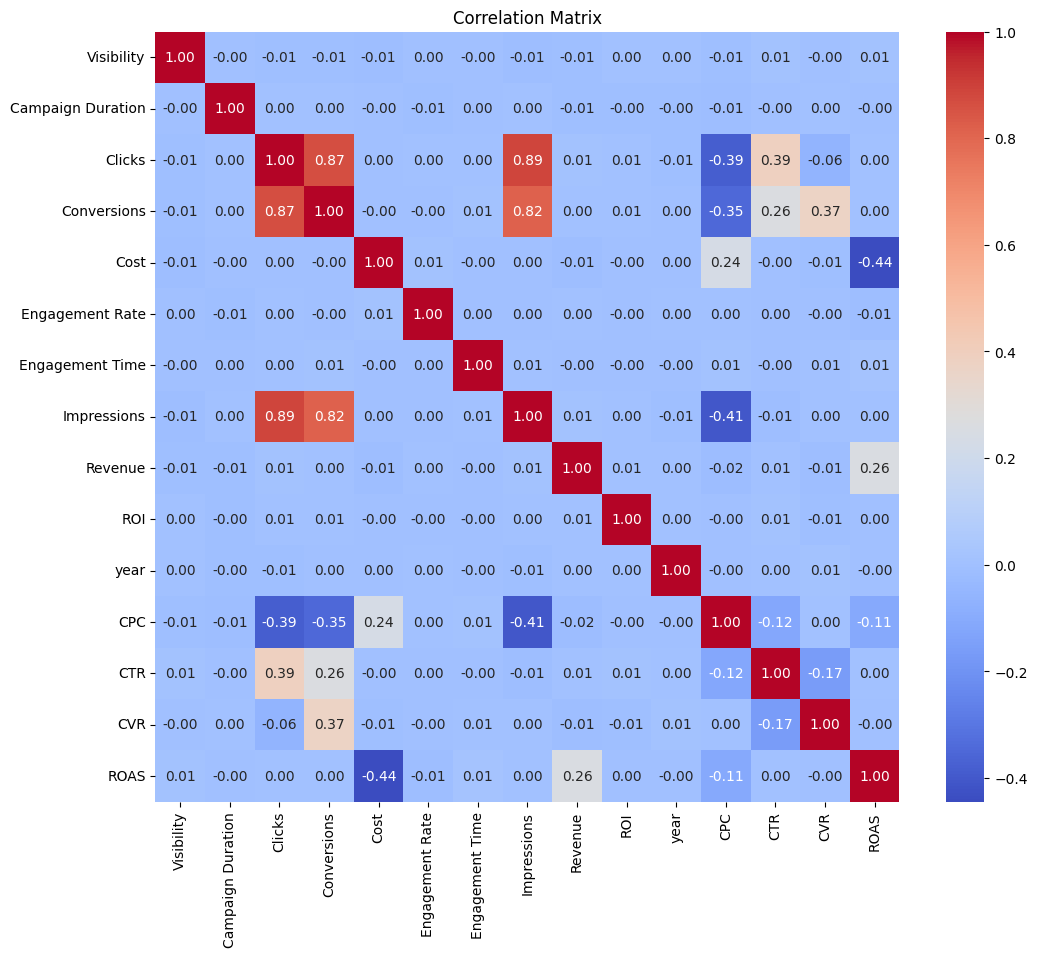

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

세 컬럼의 상관계수가 값이 높음.

1. Conversions - Impressions : 0.82
2. Impressions - Clicks : 0.89
3. Clicks - Conversions : 0.87

VIF(Variance Inflation Factor) 로 다중공선성 여부 확인

VIF 값이 10 이상이면 다중공선성이 높다고 간주.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
X = numeric_df[['Conversions', 'Impressions', 'Clicks']]  # 중요한 컬럼만 선택
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


       feature        VIF
0  Conversions  13.336488
1  Impressions  18.026285
2       Clicks  24.323149


VIF 값이 전부 10 이상이므로 삭제하는 것을 전제로 함.


1. 예측하려는 목표가 Revenue인 경우:
- Conversions는 가장 핵심적인 결과 지표이며, Clicks와 Impressions는 이를 유도하는 중간 단계에 해당한다.다중공선성을 피하기 위해서 최종 성과를 대표하는 Conversions를 남기고 나머지는 제거.

Impression, Clicks 컬럼을 삭제했을 때의 대안

1. 파생변수 CTR(Clicks/Impressions) 또는 CVR(Conversions/Clicks)를 사용해
기존 데이터를 압축하여 공선성을 줄이면서도 정보 손실을 방지



## 태블로로 시각화를 하다보니 roas가 높고 roi가 낮게 나오는 경향을 파악했다.

매출이 광고비에 비해 높지만, 전체적인 비용을 고려했을 때 이익이 적거나 손해라는 건데.
찾아보니 광고비 외에 다른 비용이 너무 많이 발생했거나, 인건비,운영비가 너무 높아서 생기는 문제라고 했다

운영비나 물건 가격, 등 다른 지표들도 확인해 보아야 할 필요성이 있음.

- 광고비 외의 다른 운영비용등을 확인해보고 절감하는 방향으로 세워야 한다고 해석됨.

## 수익(Revenue)이 커질 수록 ROAS는 높아지고 ROI가 낮아진다고 생각한 상황.

데이터에 대한 이해도가 낮은 상태로 팀원과 의사소통이 제대로 되지 않았다.

python으로 데이터를 간단하게 확인을 해 보고 deepdive 했으면 좋았을 것 같다.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
numeric_df.columns

Index(['Visibility', 'Campaign Duration', 'Clicks', 'Conversions', 'Cost',
       'Engagement Rate', 'Engagement Time', 'Impressions', 'Revenue', 'ROI',
       'year', 'CPC', 'CTR', 'CVR', 'ROAS'],
      dtype='object')

## 수익에 따른 ROAS, ROI 추세 확인

In [43]:
import pltKorean_mac
pltKorean_mac.set_font_manager()

Using font: /Library/Fonts/Arial Unicode.ttf


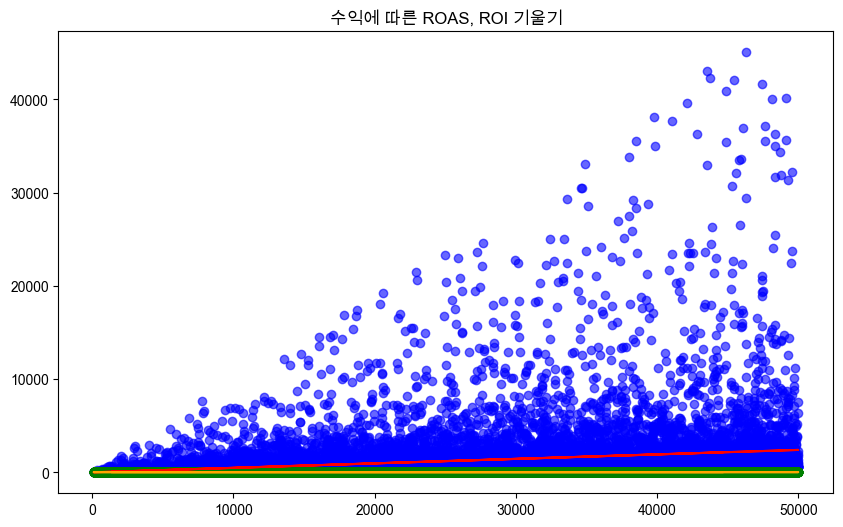

In [45]:
# 독립 변수(X)와 종속 변수(Y) 정의
X = numeric_df[['Revenue']]  # 독립 변수와
y_roas = numeric_df['ROAS']  # 종속 변수 1: ROAS
y_roi = numeric_df['ROI']    # 종속 변수 2: ROI

# 선형 회귀 모델 생성 및 학습
model_roas = LinearRegression()
model_roi = LinearRegression()
model_roas.fit(X, y_roas)
model_roi.fit(X, y_roi)

# 추세선 계산
y_pred_roas = model_roas.predict(X)
y_pred_roi = model_roi.predict(X)

# 시각화
plt.figure(figsize=(10, 6))

# 데이터 산점도
plt.scatter(numeric_df['Revenue'], y_roas, color='blue', label='ROAS Data', alpha=0.6)
plt.scatter(numeric_df['Revenue'], y_roi, color='green', label='ROI Data', alpha=0.6)

# 추세선
plt.plot(numeric_df['Revenue'], y_pred_roas, color='red', label='ROAS Trend Line')
plt.plot(numeric_df['Revenue'], y_pred_roi, color='orange', label='ROI Trend Line')

# 그래프 설정
plt.title('수익에 따른 ROAS, ROI 기울기')
plt.show()


### ROAS, ROI의 기울기의 차이가 미비하다.

xgboost를 사용해 컬럼 별로 설명력이 높은 것을 알아보자.

In [46]:
import xgboost
import shap

In [47]:
# 상관계수 높은 컬럼 삭제 : 'Clicks','Impressions'
# Revenue예측을 하기 위해 Revenue로 계산한 식들은 제외 후 예측 진행 'Revenue','ROI','ROAS

#X = numeric_df.drop(columns=['Revenue','Clicks','Impressions','ROI','ROAS','CVR'])
X = numeric_df.drop(columns=['Revenue','Clicks','Impressions','ROI','ROAS'])
y = numeric_df['Revenue']

In [56]:
(1/2)+(2/3)

0.75

In [57]:
(1+2)/(2+3)

0.6

스케일러 사용할까?

Linear 쪽은 해주는 게 필요하지만 XGBoost는 트리 기반 모델이므로 이상치에 민감하지 않으니 패스.

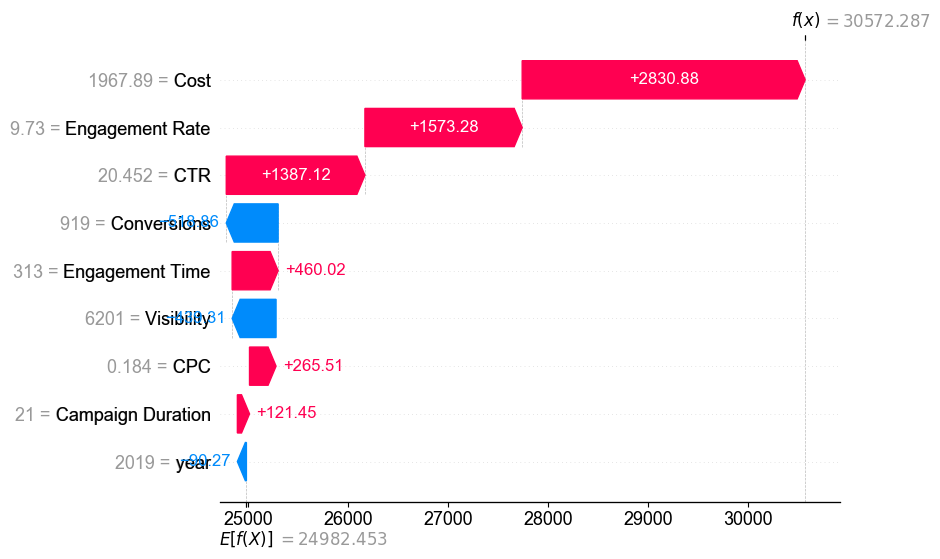

In [48]:
# 왜 XG Boost 사용했나..(다른 모델이랑 비교하는 파트 추가)
ROI_model = xgboost.XGBRegressor().fit(X,y)

explainer = shap.Explainer(ROI_model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

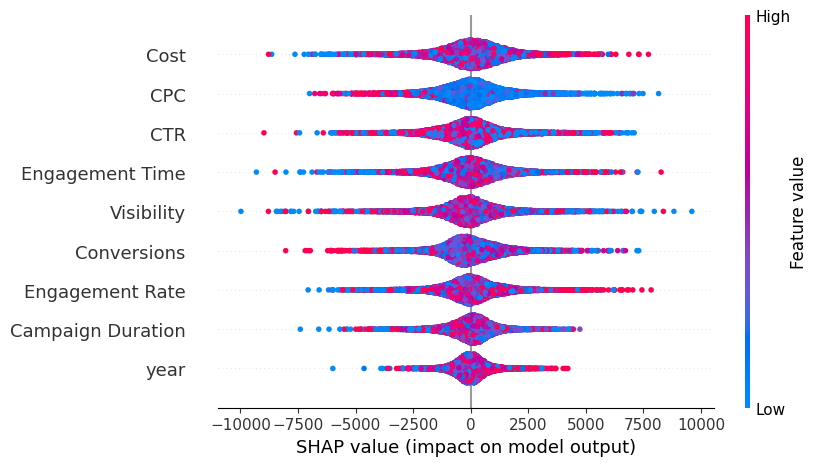

In [55]:
shap.plots.beeswarm(shap_values)

In [56]:
# 첫 번째 샘플의 SHAP 값
first_sample_shap_values = shap_values.values[0]
first_sample_shap_values

array([-439.30774 ,  121.45419 , -518.8589  , 2830.8782  , 1573.2783  ,
        460.02487 ,  -90.265564,  265.50958 , 1387.1213  ], dtype=float32)

## Conversions와 Revenue 간에 음의 관계가 나오는 이유?

1. Conversions와 Revenue 사이에 복잡한 상호작용이 있을 수 있습니다. 

- 예를 들어, 비용(Cost), 채널(Channel), 광고 전략 등이 수익에 영향을 미칠 수 있습니다.

- Conversions가 증가하더라도, 만약 비용이 너무 높거나 효율이 떨어지는 캠페인이라면 수익이 감소할 수 있습니다.

예를 들어, 마케팅 캠페인에서 저렴한 비용의 제품이 많이 팔리지만, 고수익 제품은 적게 팔리면 Conversions는 높지만, 전체 수익은 낮거나 마이너스일 수 있습니다.

2. Conversions가 높지만, ROI가 낮거나 비효율적인 광고 캠페인일 수 있습니다. 

- 즉, 많은 전환이 발생했더라도 광고비나 마케팅비용이 비효율적으로 사용되었을 수 있습니다. 

- 이런 경우 Conversions가 높더라도 실제로는 수익이 적거나 손실을 낼 수 있습니다.

만약 Conversions가 매우 높지만 Cost가 너무 높아서 ROI가 부정적인 경우, Conversions가 수익에 부정적인 영향을 미칠 수 있습니다.

예를 들어, Conversions는 1000이고, 그로 인해 발생한 수익이 5000이지만 비용이 6000이라면, 수익은 -1000이 되며 Conversions가 수익 예측에서 마이너스로 작용할 수 있습니다.

Conversions가 높을 때 수익(Revenue)이 낮아지는 음의 관계가 나타난다면, 
이는 Conversions의 수가 많아지더라도 수익이 증가하지 않거나 감소하는 상황을 의미합니다. 이런 경우에는 전환을 줄이거나, 비용을 낮추거나, 가격을 조정해볼 수 있다.
다만, 가격을 올리는 경우 고객의 반응을 예측하고, 전환을 줄이는 것이 효과적일 경우 전환 품질에 집중하는 것이 중요합니다.
비효율적인 전환을 줄이고, 고객 타겟팅의 정확성을 높이며, 광고 비용을 최적화하는 방식이 가장 효과적일 수 있습니다.

In [ ]:
# 새로운 데이터프레임 생성
new_X = pd.DataFrame({
    'Visibility': [4062],
    'Campaign Duration': [34],
    'Conversions': [2407],
    'Cost': [5801.66],
    'Engagement Rate': [2.81],
    'Engagement Time': [230],
    'year': [2019],
    'CPC': [4.349150],
    'CTR': [37.246526],
    'CVR': [9.549384]  # 이 컬럼은 예측에 사용되지 않으므로 이후에 제거합니다
})

# 훈련 데이터와 동일한 feature만 선택
valid_features = ['Visibility', 'Campaign Duration', 'Conversions', 'Cost', 'Engagement Rate', 'Engagement Time', 'year', 'CPC', 'CTR']
new_X = new_X[valid_features]

# XGBoost 모델로  revenue 예측
y_pred = ROI_model.predict(new_X)
print(y_pred)


[17861.457]


In [ ]:
X = numeric_df.drop(columns=['Revenue','Clicks','Impressions','ROI','ROAS','CVR'])
y = numeric_df['Revenue']